# Convert audio files to melspectrograms to be used as input images to the image classification algorithm

### This process will take the 3 second audio segments and create a spectral visual representation of them

## Step 1: Install dependencies 

In [ ]:
!pip install librosa

#### If you have trouble installing librosa using the above command, try the following alternative:
!conda install -c conda-forge librosa -y

In [2]:
import os 
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
import numpy as np

#### Suppress FutureWarnings because the current version of librosa throws many of these

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### Step 2: These are our functions to create the spectogram and melspectograms 

For our methodology we have chosen to use the melspectrogram method

We have configured matplotlib to output each gram as 224 x 224 pixels

In [4]:
def make_spgram(file_path, class_name): 
    base = os.path.basename(file_path)
    #need subfolder too 
    input_file = os.path.splitext(base)[0]

    clip, sample_rate = librosa.load(file_path, sr=None)
    n_fft = 1024 # frame length 
    
    hop_length = 512
    stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
    stft_magnitude, stft_phase = librosa.magphase(stft)
    stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    plt.figure(figsize=(4, 4))

    librosa.display.specshow(stft_magnitude_db, x_axis=None, y_axis=None, 
                             sr=sample_rate, hop_length=hop_length)

    plt.savefig('Training_spgram/'+class_name+'/'+input_file+'.png',bbox_inches='tight',pad_inches=0)
    plt.clf()

In [22]:
def make_melspgram(file_path, class_name): 
    n_mels = 64
    base = os.path.basename(file_path)
    input_file = os.path.splitext(base)[0]

    clip, sample_rate = librosa.load(file_path, sr=None)
    n_fft = 1024 # frame length 

    fmin = 0            
    fmax = 22050 # sample_rate/2
    hop_length = 512
    mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft, hop_length=hop_length,
                                              n_mels=n_mels, sr=sample_rate, power=1.0,
                                              fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mel_spec_db, x_axis=None,  y_axis=None, 
                             sr=sample_rate, hop_length=hop_length, 
                             fmin=fmin, fmax=fmax)    
    plt.savefig('Training_melgram/'+class_name+'/'+input_file+'.png',bbox_inches='tight',pad_inches=0)
    #plt.show()
    plt.close()

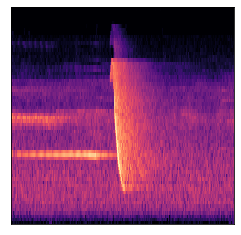

<Figure size 432x288 with 0 Axes>

In [18]:
make_melspgram('Training_audio/whipbird/whipbird_10_stereo_2500_5500.wav', 'whipbird')

### Step 3 apply it to the images, by going through the folders and sub-folders 

In [23]:
import os
rootdir = './Training_audio/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file_path = os.path.join(subdir, file)
        category = subdir.split('/')[2]
        if not os.path.isdir('Training_melgram/'+category): 
            os.mkdir('Training_melgram/'+category)
            os.mkdir('Training_spgram/'+category)
        make_melspgram(file_path, category)
        make_spgram(file_path, category)
        

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>